In [1]:
from skimage.future import graph
from skimage import data, segmentation, color, filters, io
from matplotlib import pyplot as plt
import os
import numpy as np

def plot_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def load_image(file_name):
    return io.imread(os.path.join('Training_Data/', file_name))


In [2]:
img = load_image('Add MS 7474_0042.tif')

In [3]:
labels = segmentation.slic(img, compactness=30, n_segments=400)

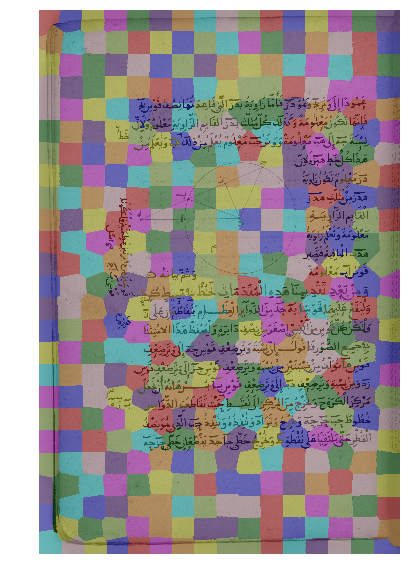

In [5]:
plot_image(color.label2rgb(labels, img))

In [6]:
gimg = color.rgb2gray(img)

In [8]:
edges = filters.sobel(gimg)

In [9]:
edges_rgb = color.gray2rgb(edges)

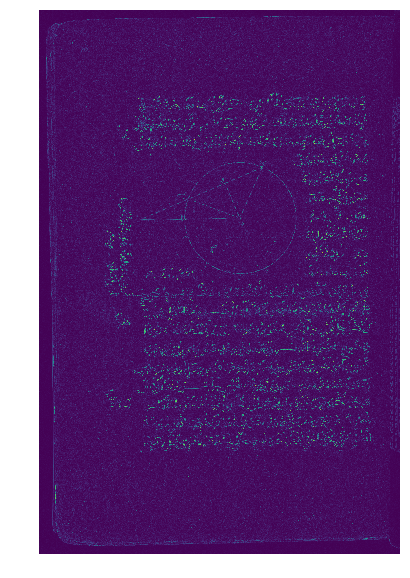

In [10]:
plot_image(edges)

In [22]:
g = graph.rag_boundary(labels, edges)

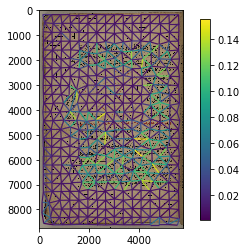

In [23]:
lc = graph.show_rag(labels, g, img, img_cmap=None, edge_cmap='viridis',
                    edge_width=1.2)
plt.colorbar(lc, fraction=0.03)
plt.show()

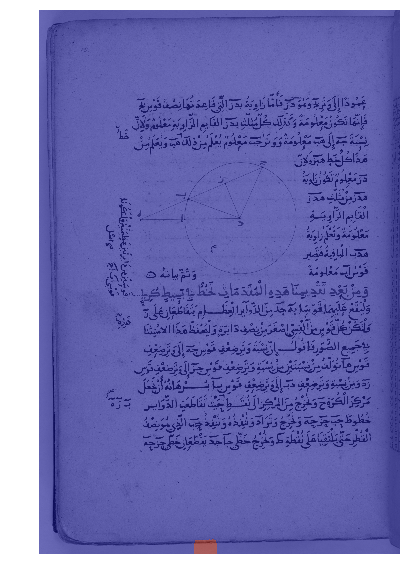

In [21]:
labels = labels + 1
final_labels = graph.cut_normalized(labels, g)
final_label_rgb = color.label2rgb(final_labels, img, kind='overlay')
plot_image(final_label_rgb)